In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

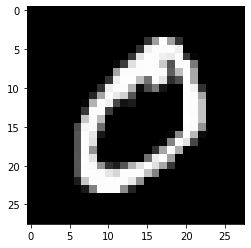

In [6]:
data = datasets.fetch_openml('mnist_784',version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:300, :])


In [11]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:300])),
    columns=['x','y','targets']
)
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [12]:
tsne_df

,x,y,targets
0,-12.744835,3.295701,5
1,13.696024,18.154776,0
2,7.692165,28.688610,4
3,14.263752,-3.708191,1
4,-9.970965,-17.185566,9
...,...,...,...
295,-7.031466,4.628022,8
296,12.937402,15.940506,0
297,-15.779482,-12.330271,4
298,2.752925,7.229321,3


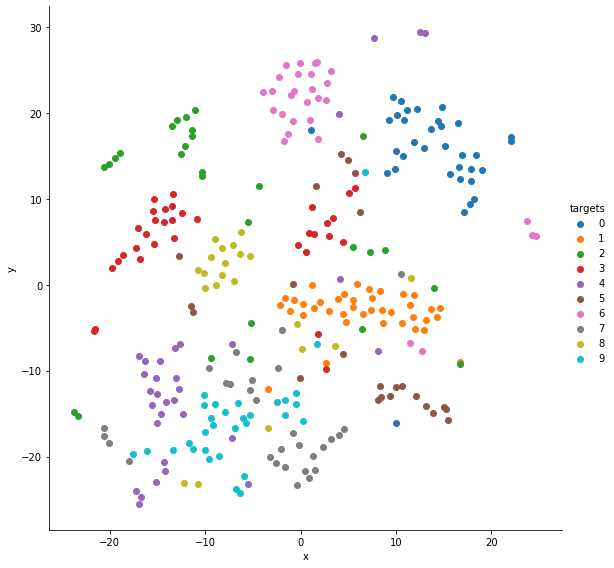

In [15]:
grid = sns.FacetGrid(tsne_df,hue="targets", height=8)
grid.map(plt.scatter, "x","y").add_legend()